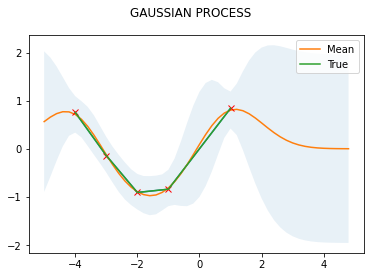

In [2]:
#GAUSSIAN PROCESS
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, uniform, randn
from scipy.stats import norm

def dataSet_2():
    X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
    Y_train = np.sin(X_train)
    X_test = np.arange(-5, 5, 0.2).reshape(-1, 1)
    return X_train,Y_train,X_test

x_train, y_train, x_test = dataSet_2()
plt.plot(x_train, y_train)


def kernel(X1,X2, scale=1.0, sigma_f = 1.0):
    sqdist = np.sum(X1 ** 2 ,1).reshape(-1,1) + np.sum(X2**2,1) - 2 * np.dot(X1,X2.T)
    return sigma_f**2  * np.exp(-0.5 / scale**2  * sqdist)

    
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.plot(X_train,Y_train,label='True')    
    plt.legend()

beta = 25
C = kernel(x_train,x_train)
k = kernel(x_train,x_test)
c = kernel(x_test,x_test)

C = C + np.eye(C.shape[0])* (1/beta)
L = np.linalg.cholesky(C)
alpha = np.dot(np.linalg.inv(L.T),np.dot(np.linalg.inv(L),y_train))
f = np.dot(k.T , alpha)
v = np.dot(np.linalg.inv(L) , k)
var = c - np.dot(v.T,v)
plot_gp(f, var, x_test, x_train, y_train)
plt.suptitle(   "GAUSSIAN PROCESS"  )
plt.savefig("T6-1")
